In [70]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [71]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists


In [72]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [73]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [74]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


In [75]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

In [76]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [77]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [78]:
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM :{}".format(score))

SSIM :0.31686135690489126


In [79]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [80]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Image is 


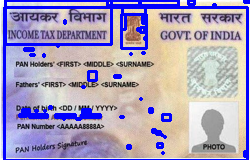

In [81]:
#Display the Original Image
print("Original Image is ")
Image.fromarray(original)


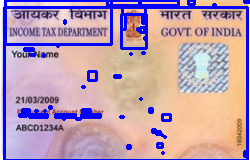

In [84]:
Image.fromarray(tampered)

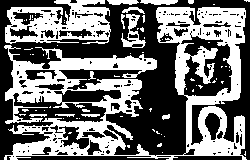

In [85]:
Image.fromarray(diff)
Image.fromarray(thresh)